In [1]:
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from utils import *

In [2]:
data1d = pd.read_csv('./data/1d/floor1.csv').drop(['Date', 'sum'], axis=1).to_numpy()
data1d, min, max = minmax(data1d, axis=0)
print(data1d.shape)

(13176, 4)


In [3]:
X1d, Y1d = make_sequence(data1d)

In [4]:
train_size = int(len(X1d) * .6)
eval_size = int(len(X1d) * .2)

train_X = X1d[:train_size]
val_X = X1d[train_size:train_size+eval_size]
test_X = X1d[train_size+eval_size:]

train_Y = Y1d[:train_size]
val_Y = Y1d[train_size:train_size+eval_size]
test_Y = Y1d[train_size+eval_size:]

In [5]:
train_set = CustomDataset(train_X, train_Y)
val_set = CustomDataset(val_X, val_Y)
test_set = CustomDataset(test_X, test_Y)

batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size, pin_memory=True, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, pin_memory=True, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, pin_memory=True, shuffle=False)

In [6]:
print(f'train: {train_X.shape[0]}')

print(f'val: {val_X.shape[0]}')

print(f'test: {test_X.shape[0]}')

train: 7704
val: 2568
test: 2569


In [7]:
xx, yy = next(iter(train_loader))
print(xx.shape)

torch.Size([64, 168, 4])


In [8]:
import time
from tqdm import tqdm
from models import PatchTST
from config import PatchTSTConfig
from torch import nn
from torch.optim import AdamW

epochs = 50
lr = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = PatchTSTConfig()
model = PatchTST(config)
model = model.to(device)
opt = AdamW(model.parameters(), lr=lr)
criterion = nn.MSELoss()

train_losses = []
val_losses = []
for epoch in range(epochs):
    t0 = time.time()
    tr_loss = 0.0
    model.train()
    for X, Y in tqdm(train_loader):
        opt.zero_grad()
        X, Y = X.to(device), Y.to(device)
        preds = model(X)
        loss = criterion(preds, Y)
        loss.backward()
        opt.step()
        tr_loss += loss.item()/len(train_loader)
    train_losses.append(tr_loss)
    t1 = time.time()
    print(f'Epoch {epoch+1} | Train: {tr_loss:.6f} | {t1-t0:.2f}sec')

    with torch.no_grad():
        model.eval()
        val_loss = 0.0
        for X, Y in tqdm(val_loader):
            X, Y = X.to(device), Y.to(device)
            preds = model(X)
            loss = criterion(preds, Y)
            val_loss += loss.item()/len(val_loader)

        val_losses.append(val_loss)
        print(f'Epoch {epoch+1} | Val: {val_loss:.6f} | {time.time()-t1:.2f}sec')

100%|██████████| 121/121 [00:14<00:00,  8.33it/s]


Epoch 1 | Train: 0.011786 | 14.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 1 | Val: 0.012223 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.92it/s]


Epoch 2 | Train: 0.010785 | 13.56sec


100%|██████████| 41/41 [00:01<00:00, 25.37it/s]


Epoch 2 | Val: 0.012208 | 1.62sec


100%|██████████| 121/121 [00:13<00:00,  9.00it/s]


Epoch 3 | Train: 0.010623 | 13.46sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 3 | Val: 0.011953 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.91it/s]


Epoch 4 | Train: 0.010372 | 13.58sec


100%|██████████| 41/41 [00:01<00:00, 25.70it/s]


Epoch 4 | Val: 0.011838 | 1.60sec


100%|██████████| 121/121 [00:13<00:00,  8.92it/s]


Epoch 5 | Train: 0.009925 | 13.57sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 5 | Val: 0.012125 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.97it/s]


Epoch 6 | Train: 0.009366 | 13.48sec


100%|██████████| 41/41 [00:01<00:00, 25.99it/s]


Epoch 6 | Val: 0.012758 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.97it/s]


Epoch 7 | Train: 0.008865 | 13.48sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 7 | Val: 0.013118 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.97it/s]


Epoch 8 | Train: 0.008328 | 13.48sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 8 | Val: 0.013461 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.97it/s]


Epoch 9 | Train: 0.007771 | 13.48sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 9 | Val: 0.013924 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 10 | Train: 0.007199 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 10 | Val: 0.014354 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 11 | Train: 0.006679 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 11 | Val: 0.014451 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 12 | Train: 0.006229 | 13.55sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 12 | Val: 0.014972 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 13 | Train: 0.005865 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 13 | Val: 0.015125 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 14 | Train: 0.005541 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 14 | Val: 0.015596 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 15 | Train: 0.005281 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 15 | Val: 0.015816 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.93it/s]


Epoch 16 | Train: 0.005025 | 13.55sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 16 | Val: 0.016318 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 17 | Train: 0.004806 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 17 | Val: 0.016094 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 18 | Train: 0.004609 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 18 | Val: 0.016465 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 19 | Train: 0.004425 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 19 | Val: 0.016428 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 20 | Train: 0.004258 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 20 | Val: 0.016910 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 21 | Train: 0.004093 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.74it/s]


Epoch 21 | Val: 0.016938 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 22 | Train: 0.003946 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 22 | Val: 0.017243 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.93it/s]


Epoch 23 | Train: 0.003810 | 13.55sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 23 | Val: 0.017405 | 1.58sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 24 | Train: 0.003676 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.97it/s]


Epoch 24 | Val: 0.017637 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 25 | Train: 0.003558 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 25 | Val: 0.017471 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 26 | Train: 0.003438 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 26 | Val: 0.017696 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 27 | Train: 0.003333 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 27 | Val: 0.018172 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 28 | Train: 0.003228 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 28 | Val: 0.018392 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 29 | Train: 0.003126 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 29 | Val: 0.018296 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 30 | Train: 0.003033 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 30 | Val: 0.018179 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 31 | Train: 0.002940 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 31 | Val: 0.018299 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 32 | Train: 0.002861 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 32 | Val: 0.018958 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 33 | Train: 0.002768 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 33 | Val: 0.018899 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 34 | Train: 0.002702 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 34 | Val: 0.018908 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 35 | Train: 0.002620 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 35 | Val: 0.018873 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 36 | Train: 0.002547 | 13.55sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 36 | Val: 0.019368 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 37 | Train: 0.002486 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 37 | Val: 0.018873 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 38 | Train: 0.002418 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.72it/s]


Epoch 38 | Val: 0.019169 | 1.61sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 39 | Train: 0.002347 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 39 | Val: 0.019189 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 40 | Train: 0.002288 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 40 | Val: 0.019539 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 41 | Train: 0.002230 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 41 | Val: 0.019358 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 42 | Train: 0.002183 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 42 | Val: 0.019266 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 43 | Train: 0.002138 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 43 | Val: 0.019550 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 44 | Train: 0.002076 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.99it/s]


Epoch 44 | Val: 0.019814 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 45 | Train: 0.002032 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.98it/s]


Epoch 45 | Val: 0.019517 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 46 | Train: 0.001988 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 46 | Val: 0.019555 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.93it/s]


Epoch 47 | Train: 0.001943 | 13.55sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 47 | Val: 0.019765 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.95it/s]


Epoch 48 | Train: 0.001896 | 13.52sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 48 | Val: 0.020018 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 49 | Train: 0.001862 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]


Epoch 49 | Val: 0.020030 | 1.59sec


100%|██████████| 121/121 [00:13<00:00,  8.94it/s]


Epoch 50 | Train: 0.001815 | 13.53sec


100%|██████████| 41/41 [00:01<00:00, 25.73it/s]

Epoch 50 | Val: 0.019874 | 1.59sec


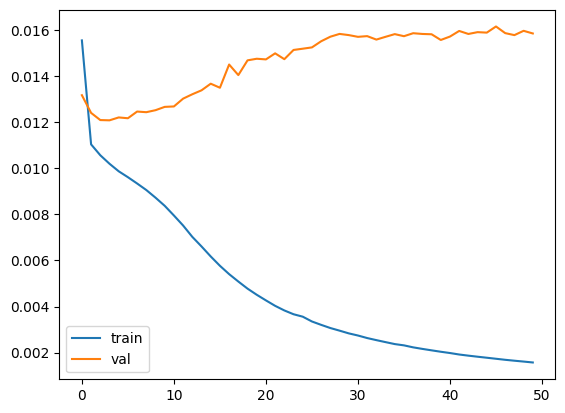

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

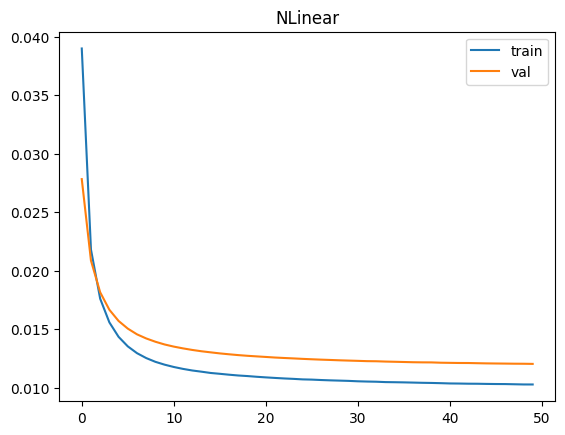

In [10]:
import matplotlib.pyplot as plt

plt.title('NLinear')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

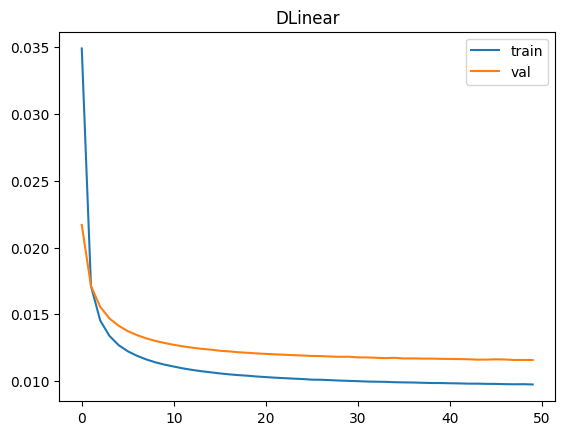

In [13]:
import matplotlib.pyplot as plt

plt.title('DLinear')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

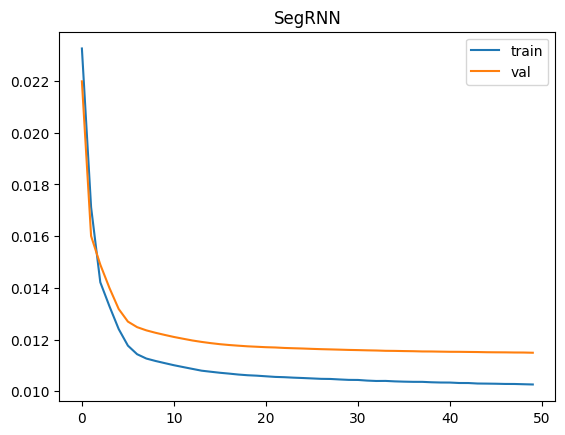

In [16]:
import matplotlib.pyplot as plt

plt.title('SegRNN')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

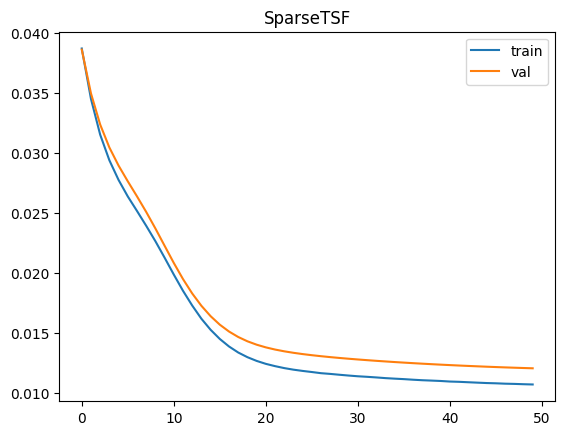

In [16]:
import matplotlib.pyplot as plt

plt.title('SparseTSF')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

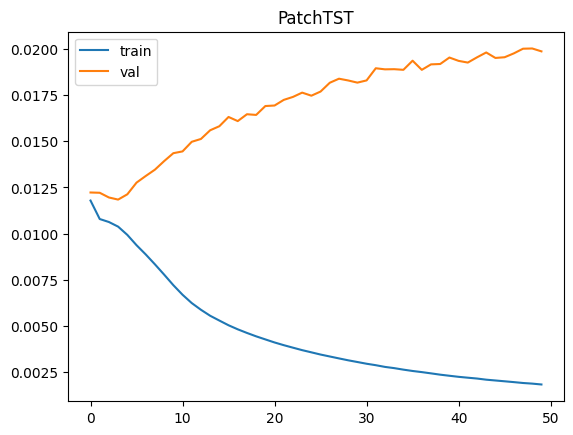

In [9]:
import matplotlib.pyplot as plt

plt.title('PatchTST')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

In [10]:
# timesnet
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:01<00:00, 32.94it/s]

MSE: 0.0094
MAE: 0.0597
RMSE: 0.0870
MAPE: 4.9889
SMAPE: 2.6861


In [11]:
# nlinear
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:00<00:00, 243.98it/s]

MSE: 0.0073
MAE: 0.0542
RMSE: 0.0763
MAPE: 4.4910
SMAPE: 2.4408


In [14]:
# dlinear
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:00<00:00, 186.45it/s]

MSE: 0.0069
MAE: 0.0533
RMSE: 0.0749
MAPE: 4.4480
SMAPE: 2.4077


In [17]:
# segrnn
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:00<00:00, 105.24it/s]

MSE: 0.0070
MAE: 0.0525
RMSE: 0.0751
MAPE: 4.3202
SMAPE: 2.3601


In [17]:
# sparsetsf
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:00<00:00, 98.18it/s] 

MSE: 0.0073
MAE: 0.0531
RMSE: 0.0767
MAPE: 4.3755
SMAPE: 2.3847


In [10]:
# patchtst
with torch.no_grad():
    model.eval()
    mse, mae, rmse, mape, smape = 0, 0, 0, 0, 0
    for X, Y in tqdm(test_loader):
        X = X.to(device)
        Y = Y.detach().cpu().numpy()

        preds = model(X)
        preds = preds.detach().cpu().numpy()
        mse += MSE(preds, Y, axis=(0, 1))/len(test_loader)
        mae += MAE(preds, Y, axis=(0, 1))/len(test_loader)
        rmse += MSE(preds, Y, axis=(0, 1), root=True)/len(test_loader)
        mape += MAPE(preds, Y, axis=(0, 1))/len(test_loader)
        smape += SMAPE(preds, Y, axis=(0, 1))/len(test_loader)

    print(f'MSE: {mse.mean():.4f}')
    print(f'MAE: {mae.mean():.4f}')
    print(f'RMSE: {rmse.mean():.4f}')
    print(f'MAPE: {mape.mean():.4f}')
    print(f'SMAPE: {smape.mean():.4f}')

100%|██████████| 41/41 [00:01<00:00, 24.49it/s]

MSE: 0.0136
MAE: 0.0770
RMSE: 0.1003
MAPE: 6.5611
SMAPE: 3.4831
